Assignment 1

Luca Porto - 9778943

Reading and displaying thhe original dataset with errors

In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np

# Reading CSV file
df = pd.read_csv('data/iris-with-errors.csv', header=(0))

print(df.shape)
df.head(25)

(25, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
1,5.1,3.5,1.4,0.2,duplicada
2,?,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,5.1,3.5,1.4,0.2,duplicada
5,NaN,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
8,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,NaN,setosa


Ex1: Clean and remove the last 2 rows of the database

In [2]:
df = df.drop_duplicates() # Removing duplicates
df = df.replace('?', np.nan) # Replacing '?' with NaN
df = df.dropna() # Removing rows with NaN
df = df.drop(df.columns[[-1,-2]], axis = 1) # Removing two last columns

df.head(25)


,sepal_length,sepal_width,petal_length
0,5.1,3.5,1.4
3,4.7,3.2,1.3
6,5,3.6,1.4
7,5.4,3.9,1.7
10,5,3.4,1.5
11,4.4,2.9,1.4
12,4.9,3.1,1.5
13,5.4,3.7,1.5
15,4.8,3.4,1.6
16,4.8,3,1.4


Ex2: Read the data again and replace the NaN values with the median of each attribute

In [3]:
from statsmodels.robust.scale import mad

df = pd.read_csv('data/iris-with-errors.csv', header=(0))
df = df.drop_duplicates() # Removing duplicates
df = df.replace('?', np.nan) # Replacing '?' with NaN

for column in df.columns[:-1]: # Replacing NaN values with the column median
    md = df[column].median()
    df[column] = df[column].replace(np.nan, md)
    
df.head(25)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,duplicada
2,5,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
5,5,3.1,1.5,0.2,setosa
6,5,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,duplicada
9,4.6,3.4,1.4,0.2,setosa
10,5,3.4,1.5,0.2,setosa
11,4.4,2.9,1.4,0.2,duplicada
12,4.9,3.1,1.5,0.1,setosa


Ex3: Normalize and Standardize the iris data and show the probability distribution of each variable

In [4]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data/iris.csv', header=(0))

df = df.drop(df.columns[[-1]], axis = 1) # Dropping last column to work only with numbers

# Normalizing data
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
df.loc[:,:] = scaled_values

print("Normalized Data")
df.head(25)

Normalized Data


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


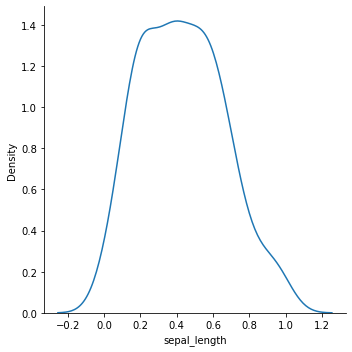

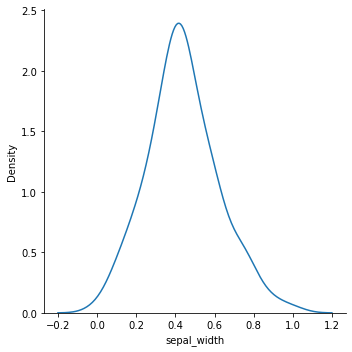

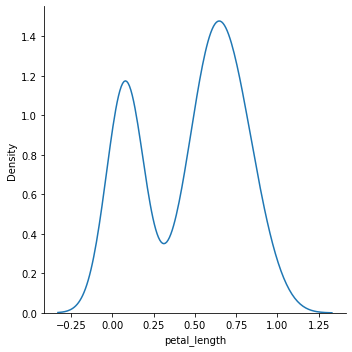

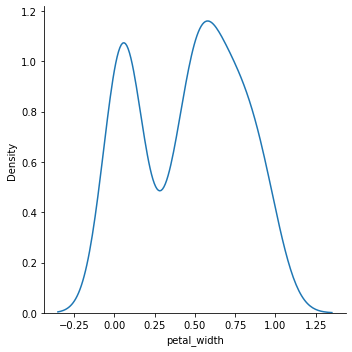

In [5]:
import seaborn as sns

for column in df:
    sns.displot(df[column], kind = 'kde')

In [6]:
from sklearn.preprocessing import StandardScaler

#Standardizing data 
names = df.columns
df[names] = StandardScaler().fit_transform(df[names])

print("Standardized Data")
df.head(25)

Standardized Data


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
5,-0.537178,1.957669,-1.170675,-1.050031
6,-1.506521,0.800654,-1.341272,-1.181504
7,-1.021849,0.800654,-1.284407,-1.312977
8,-1.748856,-0.356361,-1.341272,-1.312977
9,-1.143017,0.106445,-1.284407,-1.444450


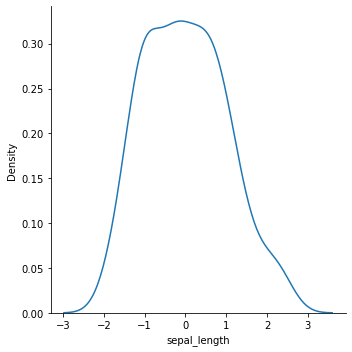

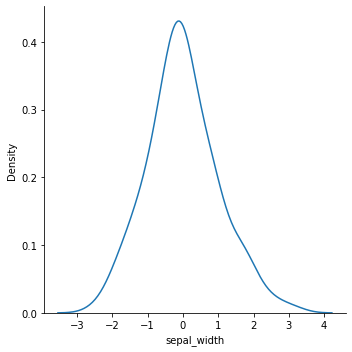

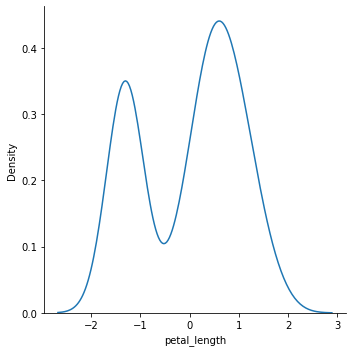

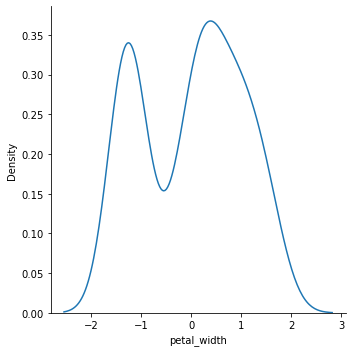

In [7]:
for column in df:
    sns.displot(df[column], kind = 'kde')


Ex4: Resample Iris dataset and choose 10 elements in each class

In [8]:
df = pd.read_csv('data/iris.csv', header=(0))

# Choosing 10 random elements from each species
df.groupby('species').apply(lambda grp: grp.sample(n=10)) 

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     39            5.1          3.4           1.5          0.2   
           46            5.1          3.8           1.6          0.2   
           6             4.6          3.4           1.4          0.3   
           11            4.8          3.4           1.6          0.2   
           42            4.4          3.2           1.3          0.2   
           1             4.9          3.0           1.4          0.2   
           10            5.4          3.7           1.5          0.2   
           45            4.8          3.0           1.4          0.3   
           18            5.7          3.8           1.7          0.3   
           31            5.4          3.4           1.5          0.4   
versicolor 50            7.0          3.2           4.7          1.4   
           85            6.0          3.4           4.5          1.6   
           57            4.9          2.4           3.3          1.0   
           54            6.5          2.8           4.6          1.5   
           93            5.0          2.3           3.3          1.0   
           86            6.7          3.1           4.7          1.5   
           56            6.3          3.3           4.7          1.6   
           60            5.0          2.0           3.5          1.0   
           97            6.2          2.9           4.3          1.3   
           88            5.6          3.0           4.1          1.3   
virginica  109           7.2          3.6           6.1          2.5   
           125           7.2          3.2           6.0          1.8   
           143           6.8          3.2           5.9          2.3   
           141           6.9          3.1           5.1          2.3   
           115           6.4          3.2           5.3          2.3   
           128           6.4          2.8           5.6          2.1   
           122           7.7          2.8           6.7          2.0   
           116           6.5          3.0           5.5          1.8   
           136           6.3          3.4           5.6          2.4   
           100           6.3          3.3           6.0          2.5   

                   species  
species                     
setosa     39       setosa  
           46       setosa  
           6        setosa  
           11       setosa  
           42       setosa  
           1        setosa  
           10       setosa  
           45       setosa  
           18       setosa  
           31       setosa  
versicolor 50   versicolor  
           85   versicolor  
           57   versicolor  
           54   versicolor  
           93   versicolor  
           86   versicolor  
           56   versicolor  
           60   versicolor  
           97   versicolor  
           88   versicolor  
virginica  109   virginica  
           125   virginica  
           143   virginica  
           141   virginica  
           115   virginica  
           128   virginica  
           122   virginica  
           116   virginica  
           136   virginica  
           100   virginica

Ex5: Create a boxplot to each variable of the iris dataset.

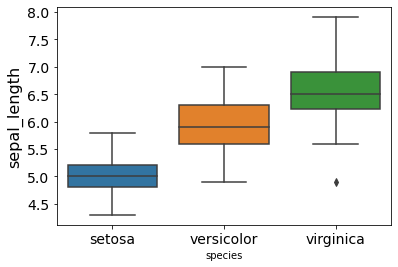

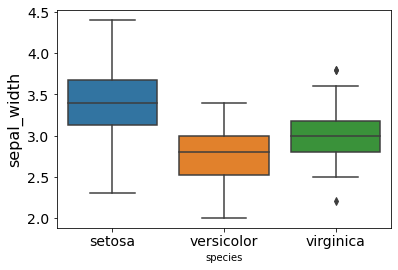

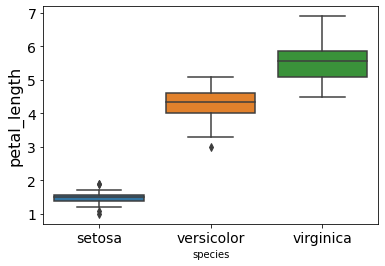

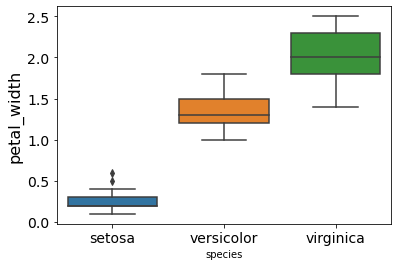

In [9]:
import matplotlib.pyplot as plt

for columns in df.columns[:-1]:
    sns.boxplot(x="species", y= columns, data=df)
    plt.ylabel(columns, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show(True)
 


Ex6: Find the Iris and BostonHouse databases outliers 
    > Iris Outliers

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

v = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)

for i in range(len(v)):
    if v[i] == True:
        print(i, v[i])

15 True
32 True
33 True
60 True


     > BostonHousing outliers 

In [11]:
bdf = pd.read_csv('data/BostonHousing.csv', header=(0))

Q1 = bdf.quantile(0.25)
Q3 = bdf.quantile(0.75)

IQR = Q3 - Q1

o = ((bdf < (Q1 - 1.5 * IQR)) | (bdf > (Q3 + 1.5 * IQR))).any(axis=1)

count = 0

for i in range(len(o)):
    if o[i] == True:
        print(i, o[i])
        count +=1

18 True
25 True
27 True
32 True
34 True
39 True
40 True
54 True
55 True
56 True
57 True
65 True
66 True
97 True
98 True
102 True
118 True
134 True
141 True
142 True
145 True
146 True
151 True
152 True
153 True
154 True
155 True
156 True
157 True
160 True
161 True
162 True
163 True
165 True
166 True
167 True
168 True
169 True
170 True
179 True
180 True
182 True
186 True
187 True
188 True
189 True
190 True
191 True
192 True
193 True
194 True
195 True
196 True
197 True
198 True
199 True
200 True
201 True
202 True
203 True
204 True
208 True
209 True
210 True
211 True
212 True
216 True
218 True
219 True
220 True
221 True
222 True
224 True
225 True
226 True
228 True
232 True
233 True
234 True
236 True
253 True
254 True
255 True
256 True
257 True
258 True
259 True
260 True
261 True
262 True
263 True
264 True
265 True
266 True
267 True
268 True
269 True
273 True
274 True
275 True
276 True
277 True
278 True
280 True
282 True
283 True
284 True
285 True
286 True
287 True
288 True
289 True
290 Tru